# Behavioral Cloning

## 1. Getting and Cleaning Data

In [1]:
# Get features and labels from raw data collected from the simulator:

import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook itself.
%matplotlib inline

##############################################################################
# Expects folder vaiable which refers to a folder containing two items -
#   1. IMG folder containing images
#   2. driving_log.csv file containing names of the images found in IMG folder 
#      and the streering angel measurement
# Returns list images and a list of corresponding steering measurements
# Also ammends the data by flipping the images and corresponding measurements
##############################################################################
def get_data_from_folder(folder, split_on='\\'):
    lines = []
    foldername = 'c:\\users\\ketan\\desktop\\' + folder
    with open(foldername + '\\driving_log.csv') as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
            lines.append(line)

    print('Number of lines in csvfile: ', len(lines))
    print('Example of a line: ', lines[1])

    lines.pop(0)
    
    images = []
    measurements = []
    for line in lines:
        source_path = line[0]
        filename = source_path.split(split_on)[-1]
        current_path = foldername + '\\img\\' + filename
        
        image = cv2.imread(current_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
        
        measurement = float(line[3])
        measurements.append(measurement)
        
        # flipping the image
        images.append(cv2.flip(image, 1))
        measurements.append(measurement * -1.0)

    return images, measurements


In [2]:
# Use above function to retrieve individual sets of data

# this is the sample dataset provided by Udacity:
images1, measurements1 = get_data_from_folder('udacity_data\\data', '/')
print('=====> done collecting udacity sample data')

# this is the data I collected from 2 laps around the circuit in counterclockwise direction:
images2, measurements2 = get_data_from_folder('ketan_data')
print('=====> done collecting counterclockwise data')

# this is the data I collected from 2 laps around the circuit in clockwise direction:
images3, measurements3 = get_data_from_folder('ketan_reverse_data')
print('=====> done collecting clockwise data')

# this is the data I collected from various areas in the circuit where the vehicle was positioned
# on either side edges of the lane and was steered back towards the center of the lane:
images4, measurements4 = get_data_from_folder('recovery')
print('=====> done collecting recovery data')

# combine all images and measurements in one list and convet to numpy array:
images = images1 + images2 + images3 + images4
measurements = measurements1 + measurements2 + measurements3 + measurements4

x_train = np.array(images)
y_train = np.array(measurements)
    
print('Shape of training data: ', x_train.shape)
print('Shape of training labels: ', y_train.shape)


Number of lines in csvfile:  8037
Example of a line:  ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
done 1
Number of lines in csvfile:  2876
Example of a line:  ['C:\\Users\\ketan\\Desktop\\data\\IMG\\center_2017_09_27_12_19_33_194.jpg', 'C:\\Users\\ketan\\Desktop\\data\\IMG\\left_2017_09_27_12_19_33_194.jpg', 'C:\\Users\\ketan\\Desktop\\data\\IMG\\right_2017_09_27_12_19_33_194.jpg', '0', '0', '0', '2.117483E-06']
done 2
Number of lines in csvfile:  2964
Example of a line:  ['C:\\Users\\ketan\\Desktop\\ketan_reverse_data\\IMG\\center_2017_09_27_15_37_51_747.jpg', 'C:\\Users\\ketan\\Desktop\\ketan_reverse_data\\IMG\\left_2017_09_27_15_37_51_747.jpg', 'C:\\Users\\ketan\\Desktop\\ketan_reverse_data\\IMG\\right_2017_09_27_15_37_51_747.jpg', '0', '0', '0', '5.098785E-06']
done 3
Number of lines in csvfile:  1266
Example of a line:  ['C:\\Users\\ketan\\Desktop\\recovery\\IMG\\center_2017_09_27_18_15_20_035.jpg', 'C:\\Users\\ketan\\Desktop\\recovery\\IMG\\left_2017_09_

In [2]:
images1, measurements1 = get_data_from_folder('data\\lap')
print('done 1')
images2, measurements2 = get_data_from_folder('udacity_data\\data', '/')
print('done 2')
images3, measurements3 = get_data_from_folder('data\\specific_training_1')
print('done 3')
images4, measurements4 = get_data_from_folder('data\\specific_training_2')
images5, measurements5 = get_data_from_folder('data\\specific_training_3')

print('done 4')


Number of lines in csvfile:  2301
Example of a line:  ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
done 1
Number of lines in csvfile:  8037
Example of a line:  ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
done 2
Number of lines in csvfile:  756
Example of a line:  ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
done 3
Number of lines in csvfile:  1247
Example of a line:  ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
Number of lines in csvfile:  275
Example of a line:  ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
done 4


In [5]:
images = images1 + images2 + images3 + images4 + images5
measurements = measurements1 + measurements2 + measurements3 + measurements4 + measurements5
x_train = np.array(images)
y_train = np.array(measurements)
    
print('Shape of training data: ', x_train.shape)
print('Shape of training labels: ', y_train.shape)

Shape of training data:  (25222, 160, 320, 3)
Shape of training labels:  (25222,)


Number of training examples = 25222
Image data shape = (160, 320, 3)
Number of classes = 1669


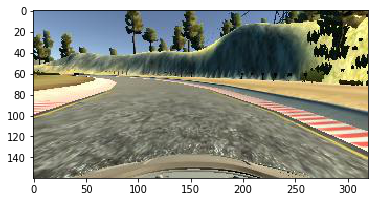

In [6]:
# Number of training examples
n_train = x_train.shape[0]

example_image = x_train[0]

# unique classes/labels in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Image data shape =", example_image.shape)
print("Number of classes =", n_classes)

plt.imshow(example_image)

In [ ]:
# trying out simplest model to see if setup is correct:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape = (160, 320, 3)))
model.add(Dense(1))

model.compile(loss = 'mse', optimizer = 'adam')
model.fit(x_train, y_train, validation_split = 0.2, shuffle = True)

model.save('model_0.h5')

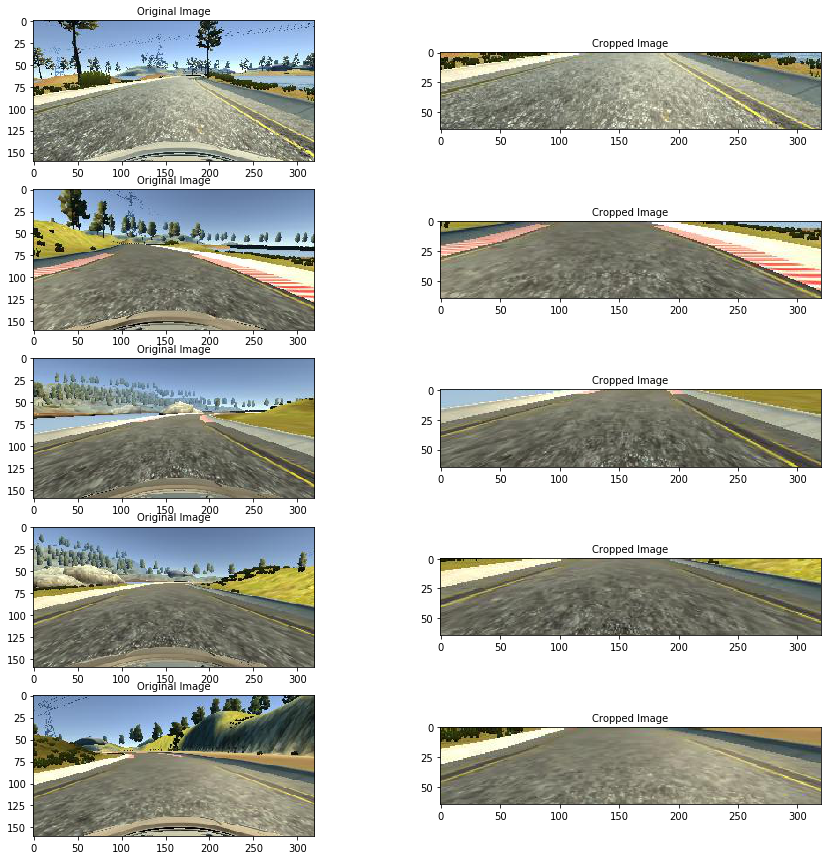

In [4]:
#Cropping:

import random

fig, list_ax = plt.subplots(5, 2, figsize=(15,15))

for i in range(5):
    index = random.randint(0, len(x_train))
    image = x_train[index]
    
    list_ax[i][0].imshow(image)
    list_ax[i][0].set_title('Original Image', fontsize=10)
    
    cropped_image = image[70:135]
    
    list_ax[i][1].imshow(cropped_image)
    list_ax[i][1].set_title('Cropped Image', fontsize=10)

In [ ]:
# Adding normalization and cropping as preprocessing steps:

from keras.models import Sequential
from keras.layers import Lambda, Cropping2D, Flatten, Dense, Activation

model = Sequential()

# normalize
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160, 320, 3)))

# cropping
model.add(Cropping2D(cropping=((60, 25), (0, 0))))

# flatten
model.add(Flatten(input_shape = (160, 320, 3)))

# fully connected layer
model.add(Dense(1))

model.compile(loss = 'mse', optimizer = 'adam')
model.fit(x_train, y_train, validation_split = 0.2, shuffle = True, nb_epoch=1)

model.save('model_1.h5')

In [ ]:
# employing convolutional layer:

from keras.models import Sequential
from keras.layers import Cropping2D
from keras.layers.core import Lambda, Flatten, Dense, Activation, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()

# normalize
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160, 320, 3)))
# cropping
model.add(Cropping2D(cropping=((65, 25), (0, 0))))

# convolution layer # 1
model.add(Convolution2D(6, 5, 5, border_mode='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Activation('relu'))

# convolution layer # 2
model.add(Convolution2D(6, 5, 5, border_mode='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Activation('relu'))

# flatten
model.add(Flatten())

# fully connected layer # 1
model.add(Dense(10))
model.add(Activation('relu'))

# fully connected layer # 2
model.add(Dense(1))
model.add(Activation('relu'))


model.compile(loss = 'mse', optimizer = 'adam')
model.fit(x_train, y_train, validation_split = 0.2, shuffle = True, nb_epoch=1)

model.save('model_4.h5')

In [ ]:
# employing lenet architecture:

from keras.models import Sequential
from keras.layers import Cropping2D
from keras.layers.core import Lambda, Flatten, Dense, Activation, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()

# normalize
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160, 320, 3)))
# cropping
model.add(Cropping2D(cropping=((65, 25), (0, 0))))

# convolution layer # 1
model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='valid'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))
#model.add(Activation('relu'))

# convolution layer # 2
model.add(Convolution2D(64, 5, 5, activation='relu', border_mode='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#model.add(Activation('relu'))

# flatten
model.add(Flatten())

# fully connected layer # 1
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))

# fully connected layer # 2
model.add(Dense(1))
model.add(Activation('relu'))


model.compile(loss = 'mse', optimizer = 'adam')
model.fit(x_train, y_train, validation_split = 0.2, shuffle = True, nb_epoch=1)

model.save('model_5.h5')

In [7]:
# employing advanced architecture:
# new_height = (input_height - filter_height + 2 * P)/S + 1

from keras.models import Sequential
from keras.layers import Cropping2D
from keras.layers.core import Lambda, Flatten, Dense, Activation, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()

# normalize
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160, 320, 3)))
# cropping
model.add(Cropping2D(cropping=((70, 25), (0, 0))))

# convolution layer # 1
# input size: 65 x 320 x 3
model.add(Convolution2D(24, 5, 5, subsample=(2, 2), activation='relu'))
# output size: 31 x 158 x 24
model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='relu'))
# output size: 14 x 77 x 36
model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='relu'))
# output size: 5 x 37 x 48
model.add(Convolution2D(64, 3, 3, activation='relu'))
# output size: 3 x 35 x 64
model.add(Convolution2D(64, 3, 3, activation='relu'))
# output size: 1 x 33 x 64

# flatten
model.add(Flatten())
# output size: 2112

# fully connected layers
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))
#model.add(Activation('relu'))

model.compile(loss = 'mse', optimizer = 'adam')
model.fit(x_train, y_train, validation_split = 0.2, shuffle = True, nb_epoch=10)

#callback_model_checkpoint = ModelCheckpoint('./model_checkpoints/model_{epoch:02d}.h5',  verbose = 1)
#history = model.fit(X, y, validation_split = 0.2, shuffle = True, nb_epoch = 20, callbacks = [callback_model_checkpoint])

model.save('model_8.h5')

Train on 6428 samples, validate on 1608 samples
Epoch 1/10
6428/6428 [==============================] - 183s - loss: 0.0117 - val_loss: 0.0097
Epoch 2/10
6428/6428 [==============================] - 137s - loss: 0.0097 - val_loss: 0.0101
Epoch 3/10
6428/6428 [==============================] - 149s - loss: 0.0096 - val_loss: 0.0099
Epoch 4/10
6428/6428 [==============================] - 161s - loss: 0.0092 - val_loss: 0.0103
Epoch 5/10
6428/6428 [==============================] - 161s - loss: 0.0088 - val_loss: 0.0110
Epoch 6/10
6428/6428 [==============================] - 383s - loss: 0.0085 - val_loss: 0.0102
Epoch 7/10
6428/6428 [==============================] - 411s - loss: 0.0083 - val_loss: 0.0097
Epoch 8/10
6428/6428 [==============================] - 300s - loss: 0.0079 - val_loss: 0.0100
Epoch 9/10
6428/6428 [==============================] - 173s - loss: 0.0076 - val_loss: 0.0106
Epoch 10/10
6428/6428 [==============================] - 152s - loss: 0.0073 - val_loss: 0.0100


In [8]:
x_train.shape

(8036, 160, 320, 3)

In [5]:
# employing advanced architecture:
# new_height = (input_height - filter_height + 2 * P)/S + 1

from keras.models import Sequential
from keras.layers import Cropping2D
from keras.layers.core import Lambda, Flatten, Dense, Activation, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()

# normalize
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160, 320, 3)))
# cropping
model.add(Cropping2D(cropping=((70, 25), (0, 0))))

# convolution layer # 1
# input size: 65 x 320 x 3
model.add(Convolution2D(24, 5, 5, subsample=(2, 2), activation='relu'))
# output size: 31 x 158 x 24
model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='relu'))
# output size: 14 x 77 x 36
model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='relu'))
# output size: 5 x 37 x 48
model.add(Convolution2D(64, 3, 3, activation='relu'))
# output size: 3 x 35 x 64
model.add(Convolution2D(64, 3, 3, activation='relu'))
# output size: 1 x 33 x 64

# flatten
model.add(Flatten())
# output size: 2112

# fully connected layers
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))
#model.add(Activation('relu'))

model.compile(loss = 'mse', optimizer = 'adam')
model.fit(x_train, y_train, validation_split = 0.2, shuffle = True, nb_epoch=10)

#callback_model_checkpoint = ModelCheckpoint('./model_checkpoints/model_{epoch:02d}.h5',  verbose = 1)
#history = model.fit(X, y, validation_split = 0.2, shuffle = True, nb_epoch = 20, callbacks = [callback_model_checkpoint])

model.save('model_9.h5')

Using TensorFlow backend.


Train on 22198 samples, validate on 5550 samples
Epoch 1/10
22198/22198 [==============================] - 446s - loss: 0.0145 - val_loss: 0.0058
Epoch 2/10
22198/22198 [==============================] - 464s - loss: 0.0127 - val_loss: 0.0054
Epoch 3/10
22198/22198 [==============================] - 442s - loss: 0.0120 - val_loss: 0.0054
Epoch 4/10
22198/22198 [==============================] - 434s - loss: 0.0118 - val_loss: 0.0049
Epoch 5/10
22198/22198 [==============================] - 436s - loss: 0.0113 - val_loss: 0.0053
Epoch 6/10
22198/22198 [==============================] - 426s - loss: 0.0110 - val_loss: 0.0063
Epoch 7/10
22198/22198 [==============================] - 495s - loss: 0.0106 - val_loss: 0.0057
Epoch 8/10
22198/22198 [==============================] - 410s - loss: 0.0101 - val_loss: 0.0060
Epoch 9/10
22198/22198 [==============================] - 411s - loss: 0.0099 - val_loss: 0.0065
Epoch 10/10
22198/22198 [==============================] - 422s - loss: 0.0094

In [7]:
# employing advanced architecture:
# new_height = (input_height - filter_height + 2 * P)/S + 1

from keras.models import Sequential
from keras.layers import Cropping2D
from keras.layers.core import Lambda, Flatten, Dense, Activation, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()

# normalize
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160, 320, 3)))
# cropping
model.add(Cropping2D(cropping=((70, 25), (0, 0))))

# convolution layer # 1
# input size: 65 x 320 x 3
model.add(Convolution2D(24, 5, 5, subsample=(2, 2), activation='relu'))
# output size: 31 x 158 x 24
model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='relu'))
# output size: 14 x 77 x 36
model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='relu'))
# output size: 5 x 37 x 48
model.add(Convolution2D(64, 3, 3, activation='relu'))
# output size: 3 x 35 x 64
model.add(Convolution2D(64, 3, 3, activation='relu'))
# output size: 1 x 33 x 64

# flatten
model.add(Flatten())
# output size: 2112

# fully connected layers
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))
#model.add(Activation('relu'))

model.compile(loss = 'mse', optimizer = 'adam')
model.fit(x_train, y_train, validation_split = 0.2, shuffle = True, nb_epoch=4)

#callback_model_checkpoint = ModelCheckpoint('./model_checkpoints/model_{epoch:02d}.h5',  verbose = 1)
#history = model.fit(X, y, validation_split = 0.2, shuffle = True, nb_epoch = 20, callbacks = [callback_model_checkpoint])

model.save('model_10.h5')

Using TensorFlow backend.


Train on 20177 samples, validate on 5045 samples
Epoch 1/4
20177/20177 [==============================] - 620s - loss: 0.0171 - val_loss: 0.0731
Epoch 2/4
20177/20177 [==============================] - 612s - loss: 0.0153 - val_loss: 0.0802
Epoch 3/4
20177/20177 [==============================] - 623s - loss: 0.0148 - val_loss: 0.0794
Epoch 4/4
20177/20177 [==============================] - 634s - loss: 0.0146 - val_loss: 0.0735


In [3]:
# employing advanced architecture:
# new_height = (input_height - filter_height + 2 * P)/S + 1

from keras.models import Sequential
from keras.layers import Cropping2D
from keras.layers.core import Lambda, Flatten, Dense, Activation, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()

# normalize
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160, 320, 3)))
# cropping
model.add(Cropping2D(cropping=((70, 25), (0, 0))))

# convolution layer # 1
# input size: 65 x 320 x 3
model.add(Convolution2D(24, 5, 5, subsample=(2, 2), activation='relu'))
# output size: 31 x 158 x 24
model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='relu'))
# output size: 14 x 77 x 36
model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='relu'))
# output size: 5 x 37 x 48
model.add(Convolution2D(64, 3, 3, activation='relu'))
# output size: 3 x 35 x 64
model.add(Convolution2D(64, 3, 3, activation='relu'))
# output size: 1 x 33 x 64

# flatten
model.add(Flatten())
# output size: 2112

# fully connected layers
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))
#model.add(Activation('relu'))

model.compile(loss = 'mse', optimizer = 'adam')
model.fit(x_train, y_train, validation_split = 0.2, shuffle = True, nb_epoch=4)

#callback_model_checkpoint = ModelCheckpoint('./model_checkpoints/model_{epoch:02d}.h5',  verbose = 1)
#history = model.fit(X, y, validation_split = 0.2, shuffle = True, nb_epoch = 20, callbacks = [callback_model_checkpoint])

model.save('model_11.h5')

Using TensorFlow backend.


Train on 24222 samples, validate on 6056 samples
Epoch 1/4
24222/24222 [==============================] - 573s - loss: 0.0137 - val_loss: 0.0121
Epoch 2/4
24222/24222 [==============================] - 457s - loss: 0.0116 - val_loss: 0.0132
Epoch 3/4
24222/24222 [==============================] - 483s - loss: 0.0112 - val_loss: 0.0124
Epoch 4/4
24222/24222 [==============================] - 484s - loss: 0.0108 - val_loss: 0.0150
